In [3]:
%load_ext autoreload
%autoreload 2

In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt

from wordle import *
#from tqdm import tqdm

# What's the best starting word?

In [16]:
get_optimal_guess(all_words, metric='var',pbar=True)

searching for optimal guess:   0%|          | 35/12972 [00:00<05:24, 39.81it/s]

react


searching for optimal guess:   0%|          | 49/12972 [00:01<05:24, 39.81it/s]

sower


searching for optimal guess:   1%|▏         | 169/12972 [00:04<05:38, 37.84it/s]

store


searching for optimal guess:   2%|▏         | 213/12972 [00:05<05:46, 36.82it/s]

solar


searching for optimal guess:   2%|▏         | 281/12972 [00:07<05:36, 37.74it/s]

saute


searching for optimal guess:   4%|▍         | 565/12972 [00:16<05:34, 37.13it/s]

arise


searching for optimal guess:   6%|▌         | 729/12972 [00:20<05:39, 36.11it/s]

snare


searching for optimal guess:  12%|█▏        | 1613/12972 [00:46<05:19, 35.50it/s]

saner


searching for optimal guess:  19%|█▉        | 2433/12972 [01:13<04:51, 36.20it/s]

aeros


searching for optimal guess:  56%|█████▋    | 7318/12972 [03:59<02:33, 36.90it/s]  

lares


'lares'

# Find out any word's performance as a starting word

In [10]:
guess = 'xylyl'

results_freq = {r:0 for r in all_results}
#hints = {r:get_hints(guess, r) for r in all_results}

for answer in all_words:
    result = get_result(answer, guess)
    results_freq[result] += 1

m = results_freq.values()

max: 8087
mean: 5401.189793401171


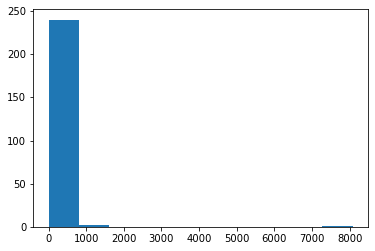

In [12]:
print('max:', max(m))
print('mean:', sum(i**2 for i in m)/len(all_words))

plt.hist(m)
plt.show()

# Comparing "AEROS", "SOARE", "AROSE"

This is an old, not optimized code, thus slower

In [56]:
m = []

for guess in ['aeros', 'soare', 'arose']:
    m.append([])
    for answer in tqdm(all_words):
        pws = test_guess(all_words, answer, guess)
        l = len(pws)

        m[-1].append(l)

100%|████████████████████████████████████████████████████████████████████████████| 12972/12972 [00:20<00:00, 636.61it/s]


In [50]:
print(*[max(a) for a in m])
print(*[min(a) for a in m])
print(*[sum(a)/len(a) for a in m])

801 769 867 697 832
1 1 1 1 1
309.73342584027137 303.8308664816528 382.0536540240518 315.1333641689793 288.7382053654024


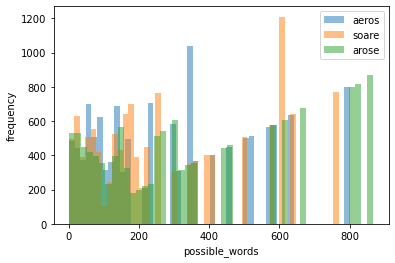

In [6]:
plt.hist(m[0], label='aeros', bins=50, alpha=0.5)
plt.hist(m[1], label='soare', bins=50, alpha=0.5)
plt.hist(m[2], label='arose', bins=50, alpha=0.5)

plt.xlabel('possible_words')
plt.ylabel('frequency')
plt.legend()

# Let's break Wordle

### Using 'mean' metric

In [23]:
with open('data/optimal_guess_after_lares.bin', 'rb') as f:
    optimal_guess_after_lares = pickle.load(f)

with open('data/possible_words_after_lares.bin', 'rb') as f:
    possible_words_after_lares = pickle.load(f)

In [25]:
possible_results_2_possible_words = {}
result_freq = {}

In [26]:
for answer in tqdm(all_words):
    result = get_result(answer, 'lares')
    
    if result in result_freq:
        result_freq[result] += 1
    
    else:
        result_freq[result] = 1
        possible_results_2_possible_words[result] = get_possible_words_with_result(all_words, 'lares', result)

100%|██████████| 12972/12972 [00:03<00:00, 3378.82it/s]


max: 697
mean: 315.1333641689793


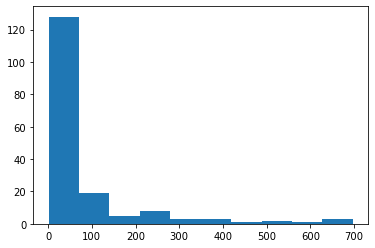

In [12]:
m = result_freq.values()

print('max:', max(m))
print('mean:', sum(i**2 for i in m)/len(all_words))

plt.hist(m)
plt.show()

In [ ]:
num_of_guess = []

for answer in tqdm(all_words):
    guess = 'lares'
    result = get_result(answer, guess)
    
    pw = possible_words_after_lares[result]
    guess = optimal_guess_after_lares[result]
    
    c = 2
    while True:
        c += 1
        pw = get_possible_words_after_guess(pw, answer, guess)
        
        if len(pw)==1: break
        
        guess = get_optimal_guess(pw, metric='var')
    
    if c > 6: print(answer, c)
    num_of_guess.append(c)

 24%|██▍       | 3102/12972 [2:35:12<15:20:35,  5.60s/it]

bells 7


 28%|██▊       | 3574/12972 [3:04:34<13:53:56,  5.32s/it]

bumps 7


 40%|████      | 5217/12972 [4:34:48<13:29:42,  6.26s/it]

fangs 7


 41%|████      | 5259/12972 [4:37:47<14:35:57,  6.81s/it]

faxes 7


 41%|████      | 5265/12972 [4:38:16<12:19:06,  5.75s/it]

fazes 7


 44%|████▎     | 5653/12972 [5:05:19<12:49:15,  6.31s/it]

gages 7


 44%|████▍     | 5742/12972 [5:11:07<12:04:13,  6.01s/it]

gazes 7


 44%|████▍     | 5769/12972 [5:13:00<7:01:06,  3.51s/it] 

In [1]:
plt.hist(num_of_guess)
plt.xlabel('number of guess')
plt.ylabel('frequency')

NameError: name 'plt' is not defined

In [13]:
for r in result_freq:
    print(r, result_freq[r])

02200 256
00220 296
00002 347
00000 832
02020 219
20002 97
22000 258
21000 123
00122 34
20010 128
01100 104
02220 166
00010 371
00020 571
01200 92
00222 64
00202 85
20000 309
02022 90
01000 400
20001 233
20020 247
02002 168
01210 90
22200 62
00212 48
00022 245
10010 37
20022 66
00100 121
00102 55
00200 300
21010 23
02201 113
02110 9
00120 105
20202 6
22020 124
00210 287
11010 17
02202 57
10002 6
10000 59
02000 453
11200 9
20012 25
01002 115
21002 27
02102 30
00012 96
02001 288
20200 52
20100 13
00112 21
22100 16
01022 29
00221 98
00201 164
02010 35
22202 3
20210 41
11022 1
00001 757
22002 67
02100 80
02222 31
22022 24
02012 11
11100 7
01020 74
00021 286
01120 23
22001 104
10212 2
00110 51
12000 32
10210 17
22010 19
10220 6
01110 28
10020 46
12020 18
01102 11
10022 8
21020 23
20220 22
01212 15
21200 8
11020 8
12200 10
10100 10
11000 36
21210 7
01010 124
01220 25
20021 99
11210 10
02210 23
22220 21
11120 1
12220 5
12022 4
10001 64
21022 9
21100 5
21012 4
22210 7
11002 5
21120 5
01122 6
0

In [44]:
qualified = [i for i in m2 if i < 7]

len(qualified)/len(m2)

0.9652328091273512

In [26]:
get_possible_words_with_result(all_words, 'lares', '21002')

{'balsa',
 'basal',
 'basil',
 'nasal',
 'palsa',
 'palsy',
 'sabal',
 'sadly',
 'salad',
 'salal',
 'salat',
 'salic',
 'salix',
 'sally',
 'salmi',
 'salol',
 'salon',
 'salop',
 'salpa',
 'salsa',
 'salto',
 'salty',
 'salut',
 'salvo',
 'saola',
 'sault',
 'vasal'}

In [35]:
possible_results_2_possible_words['22122']

{'seral'}

In [36]:
optimal_guesses = {}

for result in possible_results_2_possible_words:
    optimal_guess = get_optimal_guess(possible_results_2_possible_words[result], metric='mean', pbar=True)
    
    optimal_guesses[result] = optimal_guess

searching for optimal guess: 100%|██████████| 12972/12972 [00:02<00:00, 5311.39it/s]


IndexError: list index out of range

In [37]:
optimal_guesses

{'02200': 'tronc',
 '00220': 'droit',
 '00002': 'point',
 '00000': 'tonic',
 '02020': 'meant',
 '20002': 'thiol',
 '22000': 'aloin',
 '21000': 'tilly',
 '00122': 'house',
 '20010': 'dolci',
 '01100': 'dicty',
 '02220': 'trade',
 '00010': 'donut',
 '00020': 'tondi',
 '01200': 'robin',
 '00222': 'toise',
 '00202': 'yourt',
 '20000': 'piony',
 '02022': 'staph',
 '01000': 'minty',
 '20001': 'poult',
 '20020': 'toile',
 '02002': 'hiant',
 '01210': 'right',
 '22200': 'tragi',
 '00212': 'seity',
 '00022': 'point',
 '10010': 'myoid',
 '20022': 'stope',
 '00100': 'monty',
 '00102': 'guyot',
 '00200': 'count',
 '21010': 'divna',
 '02201': 'bract',
 '02110': 'dicta',
 '00120': 'monie',
 '20202': 'bloke',
 '22020': 'plate',
 '00210': 'poind',
 '11010': 'kydst',
 '02202': 'stamp',
 '10002': 'moult',
 '10000': 'piony',
 '02000': 'conia',
 '11200': 'baiza',
 '20012': 'spoil',
 '01002': 'synth',
 '21002': 'stoai',
 '02102': 'ducat',
 '00012': 'stond',
 '02001': 'stoai',
 '20200': 'triol',
 '20100': 'g

In [38]:
with open('optimal_guess_after_lares.bin', 'wb') as f:
    pickle.dump(optimal_guess, f)